In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
class Perceptron:
    def __init__(self, alpha = 0.1, epochs = 100):
        self.alpha = alpha
        self.epochs = epochs
        self.bias = 0
        self.weights = None
        self.misclassified = None
        
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.misclassified = []
        
        for _ in range(self.epochs):
            misclassified = 0
            for xi, target in zip(X, y):
                update = self.alpha * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                misclassified += int(update != 0.0)
            self.misclassified.append(misclassified)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def plot_misclassified(self):
        plt.plot(range(1, len(self.misclassified) + 1), self.misclassified, marker = 'o')
        plt.xlabel('Epochs')
        plt.ylabel('Number of misclassified')
        plt.show()
        
    def accuracy(self, X, y):
        return np.sum(self.predict(X) == y) / len(y)

XOR Gate:

x | y | z
---|---|---
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0

The XOR gate is a logical gate that outputs a 1 if the number of 1s in the input is odd, and 0 otherwise. It is the only logical gate that does not have a linear decision boundary. The XOR gate is a non linear gate i.e it cannot be represented by a single line. It can be represented by a circle or a curve.

As it is a non linear gate, we cannot use a single perceptron to represent it. We need to use a neural network to represent it.

The number of neurons in the input layer is equal to the number of features in the data and in very rare cases, there will be one input layer for bias. Whereas the number of neurons in the output depends on whether is the model is used as a regressor or classifier. If the model is a regressor then the output layer will have only a single neuron but in case if the model is a classifier it will have a single neuron or multiple neurons depending on the class label of the model.
Here in this case we have two input features and one output feature. So the input layer will have two neurons and the output layer will have one neuron.

The number of neurons in the hidden layer depends on the complexity of the data. If the data is linearly separable then the hidden layer will have only one neuron. But if the data is non linearly separable then the hidden layer will have more than one neuron. The number of neurons in the hidden layer is a hyperparameter and it is not easy to find the optimal number of neurons in the hidden layer. The number of neurons in the hidden layer is usually between 2 and 10.

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

- The number of hidden neurons should be between the size of the input layer and the size of the output layer.
- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The number of hidden neurons should be less than twice the size of the input layer.


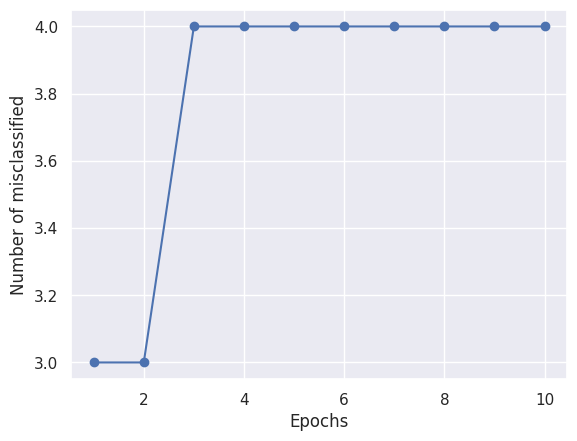

Accuracy:  0.5


In [12]:
# Implementation of XOR gate using Perceptron
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

ppn = Perceptron(alpha=0.01, epochs=10)
ppn.fit(X, y)

ppn.plot_misclassified()

# Predicting the output
print("Accuracy: ", ppn.accuracy(X, y))
